### 회귀분석 결과표 
- 회귀분석 수행후 결과표가 갖는 의미를 확인합니다
- 의미에 대한 자세한 내용은 뒤에 학습합니다.

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Index
- Sample Datas 생성
- 결과표 출력
- 결과표 해석

In [2]:
import statsmodels.api as sm
from sklearn.datasets import make_regression

### 1. Sample Datas 생성
- noise가 5인 샘플 데이터 생성
- noise가 100인 샘플 데이터 생성
- 정규분포 데이터 생성

In [7]:
feature_1, target_1 = make_regression(n_samples=20000, n_features=1, noise=5, random_state=1)
feature_2, target_2 = make_regression(n_samples=20000, n_features=1, noise=100, random_state=1)
feature_3, target_3 = np.random.randn(1000), np.random.randn(1000) # 정규분포로 생성

샘플 데이터의 그래프 그리기

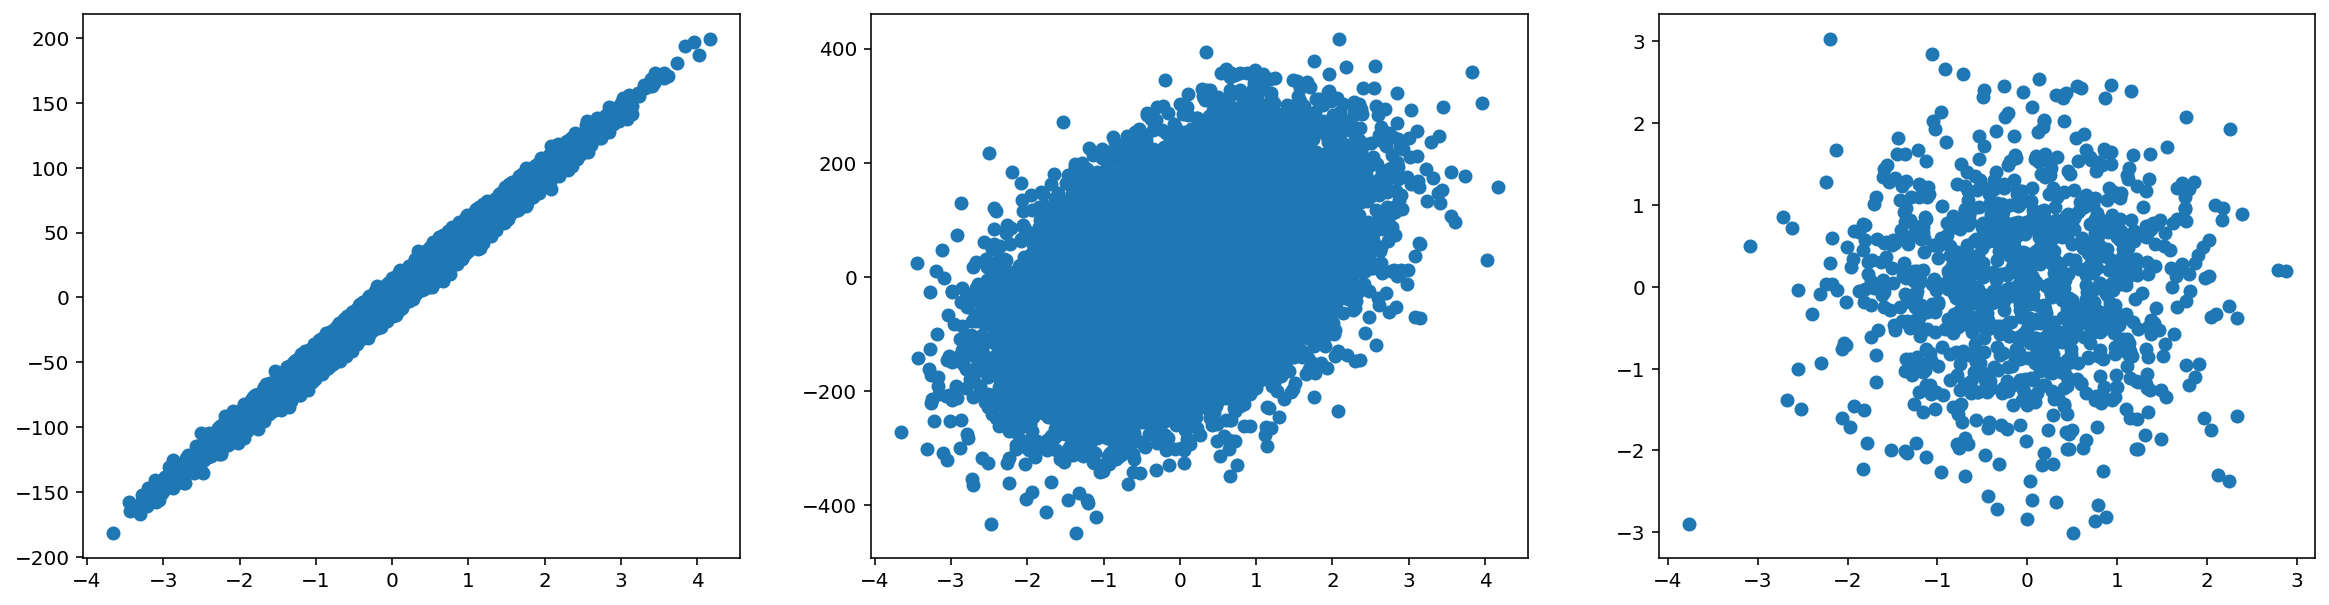

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.scatter(feature_1, target_1) # noise = 1

plt.subplot(132)
plt.scatter(feature_2, target_2) # noise = 100

plt.subplot(133)
plt.scatter(feature_3, target_3)

plt.show()

샘플 데이터를 이용한 선형회귀모델 생성

In [9]:
train_featrue_1 = sm.add_constant(featrue_1)           # constant 값 추가
model_1 = sm.OLS(target_1, train_featrue_1).fit()      # 모델 학습
pred_datas_1 = np.dot(train_featrue_1, model_1.params) # 예측값 구하기

train_featrue_2 = sm.add_constant(featrue_2)
model_2 = sm.OLS(target_2, train_featrue_2).fit()
pred_datas_2 = np.dot(train_featrue_2, model_2.params)

train_featrue_3 = sm.add_constant(featrue_3)
model_3 = sm.OLS(target_3, train_featrue_3).fit()
pred_datas_3 = np.dot(train_featrue_3, model_3.params)

### 2. 결과표 출력

In [10]:
print(model_1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989      
Dependent Variable: y                AIC:                121130.8341
Date:               2022-05-25 15:33 BIC:                121146.6411
No. Observations:   20000            Log-Likelihood:     -60563.    
Df Model:           1                F-statistic:        1.873e+06  
Df Residuals:       19998            Prob (F-statistic): 0.00       
R-squared:          0.989            Scale:              24.992     
----------------------------------------------------------------------
            Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const      -0.0134     0.0354     -0.3800   0.7039   -0.0827    0.0559
x1         48.3830     0.0354   1368.6758   0.0000   48.3137   48.4523
--------------------------------------------------------------------
Omnibus:               0.777         Durbin

In [11]:
print(model_2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.190      
Dependent Variable: y                AIC:                240960.1251
Date:               2022-05-25 15:33 BIC:                240975.9320
No. Observations:   20000            Log-Likelihood:     -1.2048e+05
Df Model:           1                F-statistic:        4687.      
Df Residuals:       19998            Prob (F-statistic): 0.00       
R-squared:          0.190            Scale:              9996.9     
-----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
-----------------------------------------------------------------------
const    -0.2687      0.7070    -0.3800    0.7039    -1.6545     1.1171
x1       48.4019      0.7070    68.4605    0.0000    47.0161    49.7877
--------------------------------------------------------------------
Omnibus:               0.777         D

In [12]:
print(model_3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.001   
Dependent Variable: y                AIC:                2862.7248
Date:               2022-05-25 15:33 BIC:                2872.5403
No. Observations:   1000             Log-Likelihood:     -1429.4  
Df Model:           1                F-statistic:        0.08370  
Df Residuals:       998              Prob (F-statistic): 0.772    
R-squared:          0.000            Scale:              1.0231   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.0104     0.0320    0.3266   0.7440   -0.0523   0.0732
x1          -0.0090     0.0313   -0.2893   0.7724   -0.0704   0.0523
------------------------------------------------------------------
Omnibus:              1.503         Durbin-Watson:           2.007
Pro

#### 결과표 정리

#### Sample Data 1

```
R-squared:     0.989

            Coef.    Std.Err.       t       P>|t| 
--------------------------------------------------
const      -0.0134     0.0354     -0.3800   0.7039
x1         48.3830     0.0354   1368.6758   0.0000
```

#### Sample Data 2

```
R-squared:     0.190

            Coef.     Std.Err.       t       P>|t|
--------------------------------------------------
const    -0.2687      0.7070    -0.3800    0.7039 
x1       48.4019      0.7070    68.4605    0.0000
```

#### Sample Data 3

```
R-squared:     0.000

         Coef.    Std.Err.      t      P>|t| 
---------------------------------------------
const   -0.0417     0.0311   -1.3401   0.1805
x1      -0.0037     0.0309   -0.1199   0.9046
```

### 3. 결과표 해석
- 1. Coef.
    - 회귀계수
    - 추세선의 파라미터
- 2. Std.Err.
    - 표준오차
    - 모집단의 여러개의 표본평균에 대한 표준편차
        - 표준오차가 작으면 회귀계수가 우연일 확률이 낮다.
        - 표준오차가 크면 회귀계수가 우연일 확률이 크다.
- 3. t
    - t-test
    - 회귀계수가 우연인지 아닌지에 대한 확률(표준오차와 반대)
        - t-test의 절대값이 클수록 우연일 확률이 낮다. (0과 멀리 떨어질수록)
        - t-test의 절대값이 작을수록 우연일 확률이 크다. (0에 가까울수록)
- 4. P>|t|
    - 유의확률 : probability value
    - 0.05 이하면 유의하다로 판단 
    - 연구가설이 맞다는것을 증명
- 5. R-squared
    - 모델의 분산 설명력
    - 높을수록 모델이 데이터를 잘 설명 -> 잘 예측

#### 3.1 회귀계수(Coef.)
- $\hat{y} = a + bx$
- const : $a$ : 절편(constant)
- x1 : $b$ : 기울기(slope)

#### Sample Data 1

```
R-squared:     0.989

            Coef.    Std.Err.       t       P>|t| 
--------------------------------------------------
const      -0.0134     0.0354     -0.3800   0.7039
x1         48.3830     0.0354   1368.6758   0.0000
```

#### 추세선 수식
- $\hat{y} = -0.0134 + 48.3830x$

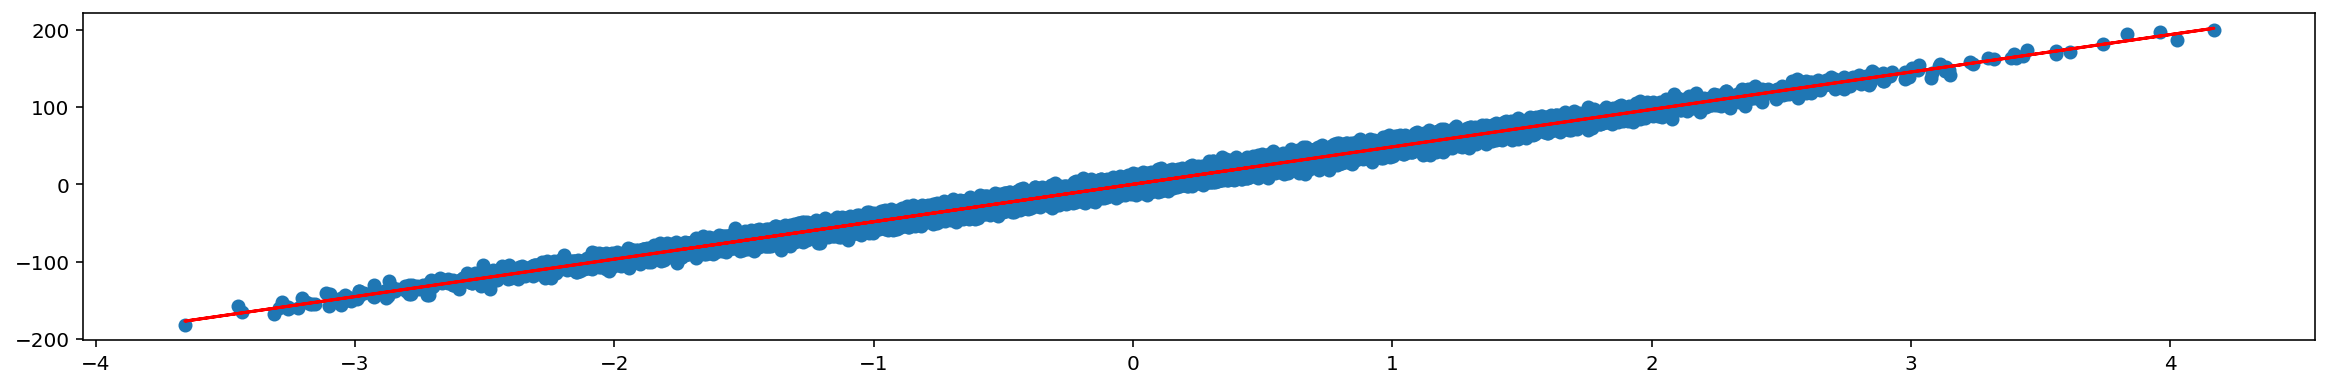

In [13]:
plt.figure(figsize=(20, 3))

plt.scatter(featrue_1, target_1)
plt.plot(featrue_1, pred_datas_1, "r-")
plt.show()

#### 3.2 표준오차 ( Std.Err. )
- 모집단에서 추출한 여러개의 표본에 대한 표본평균의 표준편차를 표준오차라고 합니다.
- 회귀방정식은 비슷하지만 데이터의 퍼짐 정도가 다른 두개의 샘플 데이터(sample_1, sample_2)를 비교합니다.
- 수식
    - $ s(표준편차) = \sqrt{\frac{\sum_{i=1}^n{(x_i-\bar{x})^2}}{n}}, (\bar{x}:평균) $
    - $ SE = \frac{s(표준편차)}{\sqrt{n}} $

#### Sample Data 1

```
R-squared:     0.989

            Coef.    Std.Err.       t       P>|t| 
--------------------------------------------------
const      -0.0134     0.0354     -0.3800   0.7039
x1         48.3830     0.0354   1368.6758   0.0000
```

#### Sample Data 2

```
R-squared:     0.190

            Coef.     Std.Err.       t       P>|t|
--------------------------------------------------
const    -0.2687      0.7070    -0.3800    0.7039 
x1       48.4019      0.7070    68.4605    0.0000
```

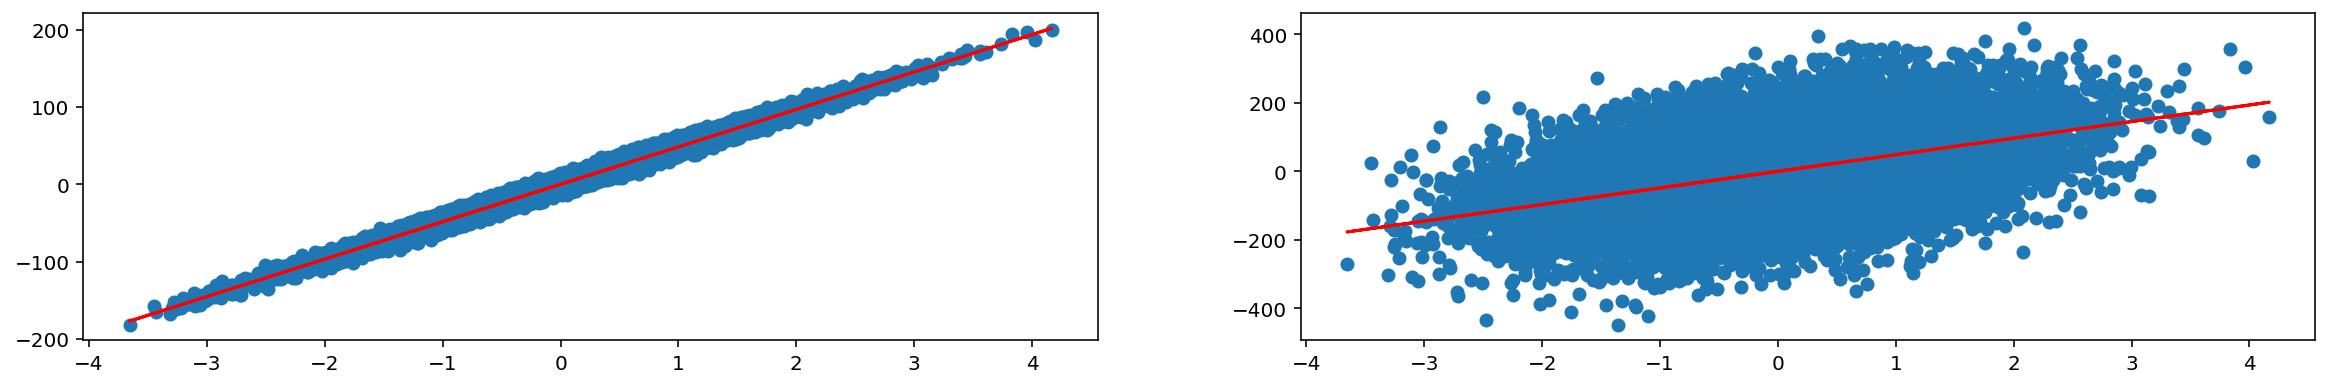

In [14]:
plt.figure(figsize=(20, 3))

plt.subplot(121)
plt.scatter(featrue_1, target_1)
plt.plot(featrue_1, pred_datas_1, "r-")

plt.subplot(122)
plt.scatter(featrue_2, target_2)
plt.plot(featrue_2, pred_datas_2, "r-")

plt.show()

#### 샘플데이터의 생성 및 회귀계수의 확인
- 서로 다른 데이터지만 같은 추세선 방정식이 나옵니다.
- $x$가 1증가 할때 $y$는 48.4이 증가합니다.
- 좌측 데이터는 추세선에 모여있고, 우측에 있는 데이터는 추세선에서 퍼져있습니다.
- 최소제곱법은 오차의 제곱합이 최소가 되는 추세선을 구해줄뿐 회귀계수가 우연인지(유의한지) 아닌지를 알수 없습니다.
    - "유의하다"라는 표현은 해당 feature(독립변수)가 target(종속변수)에 의미가 있다라는 의미 입니다.
- 48.4라는 회귀계수가 우연인지 아닌지 판단할때 표준오차를 사용합니다.
    - 샘플 데이터의 표준 오차
        - Sample Data 1 : 0.0354
        - Sample Data 2 : 0.7070
- 결론
    - Sample Data 2의 표준오차가 크기 때문에 회귀계수 48.4은 Sample Data 1 보다 우연히 나온 결과일 확률이 높다고 할수 있습니다.

In [15]:
# 추세선의 기울기값, 회귀계수 확인
np.round(model_1.params[1], 1), np.round(model_2.params[1], 1)

(48.4, 48.4)

In [16]:
# 모델의 표준오차 확인
model_1.bse[1], model_2.bse[1]

(0.035350252333112, 0.7070050466622401)

#### 3.3 t-test
- 원래 t-test는 두개의 집단이 같은지 다른지를 확인하기 위해서 사용합니다.
    - 두집단의 평균이 같으면 두집단은 같은 데이터 입니다.
    - $H_0: Mean_1 - Mean_2 = 0$ : 같은 데이터
    - $H_0: Mean_1 - Mean_2 \neq 0$ : 다른 데이터
- 회기분석에서의 t-test는 회귀계수가 우연인지 아닌지에 대한 확률을 구하는 방법입니다.
    - 추세선 방정식 : $\hat{y} = a + bx$
    - 기울기 $b$ 가 0이면 독립변수와 종속변수는 아무런 관계가 없습니다.
    - $H_0: b = 0$ : 독립변수와 종속변수가 관계 없음
    - $H_0: b \neq 0$ : 독립변수와 종속변수가 관계 있음

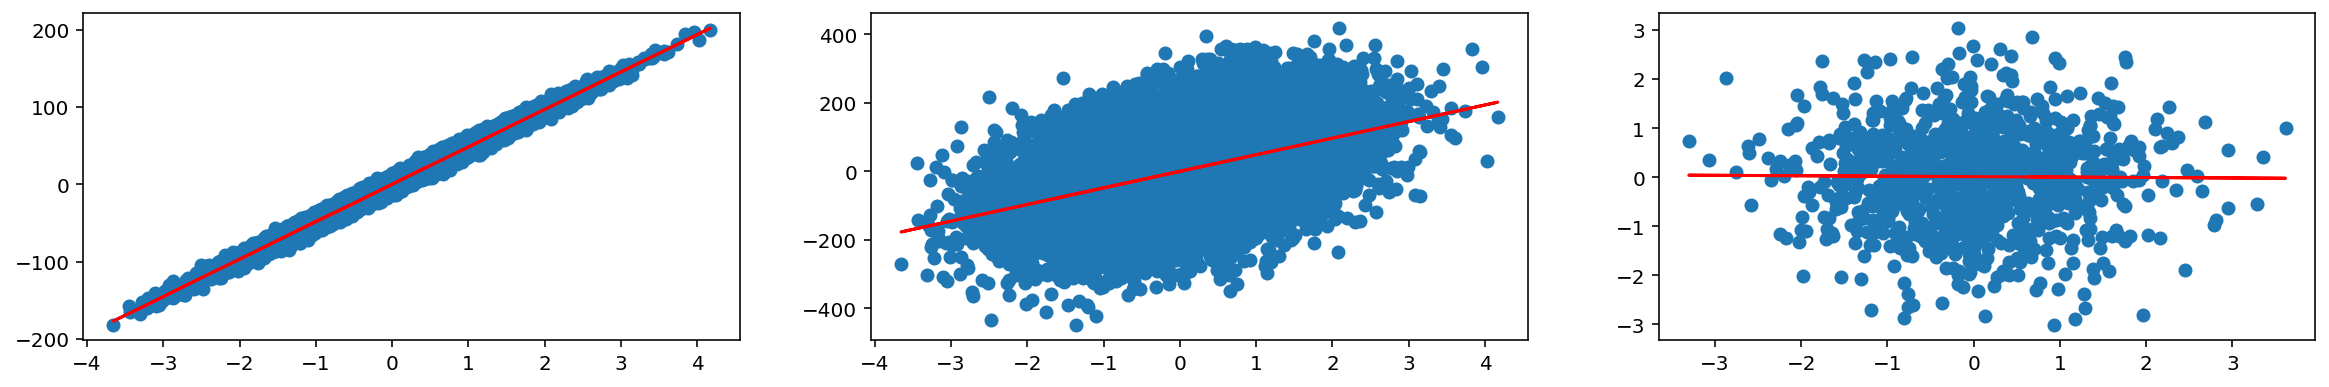

In [17]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.scatter(featrue_1, target_1)
plt.plot(featrue_1, pred_datas_1, "r-")

plt.subplot(132)
plt.scatter(featrue_2, target_2)
plt.plot(featrue_2, pred_datas_2, "r-")

plt.subplot(133)
plt.scatter(featrue_3, target_3)
plt.plot(featrue_3, pred_datas_3, "r-")

plt.show()

In [18]:
# 추세선의 기울기값, 회귀계수 확인
model_1.params[1], model_2.params[1], model_3.params[1]

(48.383034537941185, 48.40190126251244, -0.009047615522092076)

In [19]:
# 모델의 표준오차 확인
model_1.bse[1], model_2.bse[1], model_3.bse[1]

(0.035350252333112, 0.7070050466622401, 0.031273879032969285)

- Sample Data 1 은 유의 하다, Sample Data 2, Sample Data 3 은 유의하지 않습니다.
- t-test 계산법
    - $\hat{y} = a + bx$
    - t-value $ = \frac{b}{SE_b} = \frac{회기계수}{표준오차}$
    - Sample Data 1 의 t-value = $ = \frac{48.3830}{0.0354}$ = 1366.7514
    - Sample Data 2 의 t-value = $ = \frac{48.4019}{0.7070}$ = 68.4609
    - Sample Data 3 의 t-value = $ = \frac{-0.0037}{0.0309}$ = -0.1199

- Sample Data 3 해석
    - 표준오차(0.0309)만 보면 유의미한 분석인것 같습니다.
    - 회귀분석을할때 가장 먼저확인해 봐야하는것이 기울기($b$)가 0인지 아닌지를 확인해야 합니다.
        - 기울기가 0이면 독립변수와 종속변수는 아무런 관계가 없다. -> 유의하지 않다.
    - x 데이터가 y에 미치는 영향이 거의 0이므로 x 데이터는 y데이터에 영향을 거의 미치지 못합니다.
    - x 데이터로 y 데이터의 예측이 거의 불가능하므로 y 값을 예측하는데 x 값은 의미가 없습니다.
    - t-test 값도 $b$가 거의 0이기때문에 아주 낮게 나옵니다.

#### 3.4 p-value
- 어떤 사건이 우연히 발생할 확률
- 0 ~ 1 사이의 값을 가짐
- 0.05의 수치는 사건이 우연히 발생할 확률이 5%보다 작다라는 의미
- t-test값이 낮을수록 p-value 값은 높아짐

#### 3.5 R-squared
- 회귀분석
    - 종속변수와 독립변수의 인과관계를 논리적, 이론적으로 전제합니다.
    - 회귀분석은 독립변수와 종속변수의 직선관계만 분석 가능합니다. (산포도 확인)
    - 독립변수를 이용하여 종속변수를 설명합니다.
    - 독립변수가 1 증가할때 종속변수는 회귀계수($b$)만큼 증가합니다.
    - 회귀분석은 종속변수의 분산을 독립변수로 설명하는 과정입니다.

#### R-squared란?
- 종속변수 Y의 분산의 일부를 독립변수 X가 설명합니다.
- 모델의 분산 설명력이라고 할수 있습니다.
- 값이 높을수록 모델이 데이터를 잘 설명한다고 할수 있습니다.
- 설명하고 남은 오차는 알수 없는 오차 입니다.
- $R^2 = \frac{설명된분산}{종속변수의 전체분산} = 1 - \frac{SSE}{SST}$
- SST(sum of square total)
    - $SST = \sum(y_i-\bar{y_i})^2$
- SSE(sum of square error)
    - $SSE = \sum(y_i-\hat{y_i})^2$
- $R^2 = 0$ : 모델의 설명력 0%
- $R^2 = 1$ : 모델의 설명력 100%
- SSE가 클수록 $R^2$가 0에 근접
- SST가 클수록 $R^2$이 1에 근접
- 추세선의 데이터가 평균에서 멀리 떨어진 데이터 일수록 오차의 영향이 작아짐

<img src="imgs/1.png" style="width:50%; margin-top:30px;">

In [20]:
# 샘플 데이터의 R-squared : model_1이 데이터에 대해서 가장 잘 설명
model_1.rsquared, model_2.rsquared, model_3.rsquared

(0.9894373306388538, 0.18986703038743757, 8.385670791855038e-05)

- R-squared가 높으면 항상 좋은가?
    - 그렇지 않습니다.
    - 잔차도(residual plot)가 랜덤하게 분포하는것을 확인해야 합니다.
    - 독립변수를 무조건 많이 넣어도 R-squared를 증가시킵니다.
    - 높은 R-squared는 과적합(overfitting) 문제로부터 자유롭지 못합니다.

- 잔차도 : residual
    - 독립변수 X가 종속변수의 분산을 설명하고 남은 부분은 Random한 오차입니다.
    - 잔차도 그래프에 패턴이 보이면 높은 R-squared가 의미 없습니다.
    - adj. R-squared  : 잔차도가 감안된  R-squared
    - R-squared와 adj. R-squared가 차이가 크면 잔차도 문제가 있다. 그러므로 R-squared가 높은게 의미가 없다.
    - 그래프를 그려봤을때 균일한 잔차가 나오면 모델이 좋다라고 할수 있습니다.

In [21]:
# 모델 차체가 잔차가 0이 되도록 문제를 풀기 때문에 잔차의 합은 0에 가까움
np.sum(model_1.resid), np.sum(model_2.resid), np.sum(model_3.resid)

(8.802203410596121e-11, 5.1386450650170445e-11, -2.3092638912203256e-14)

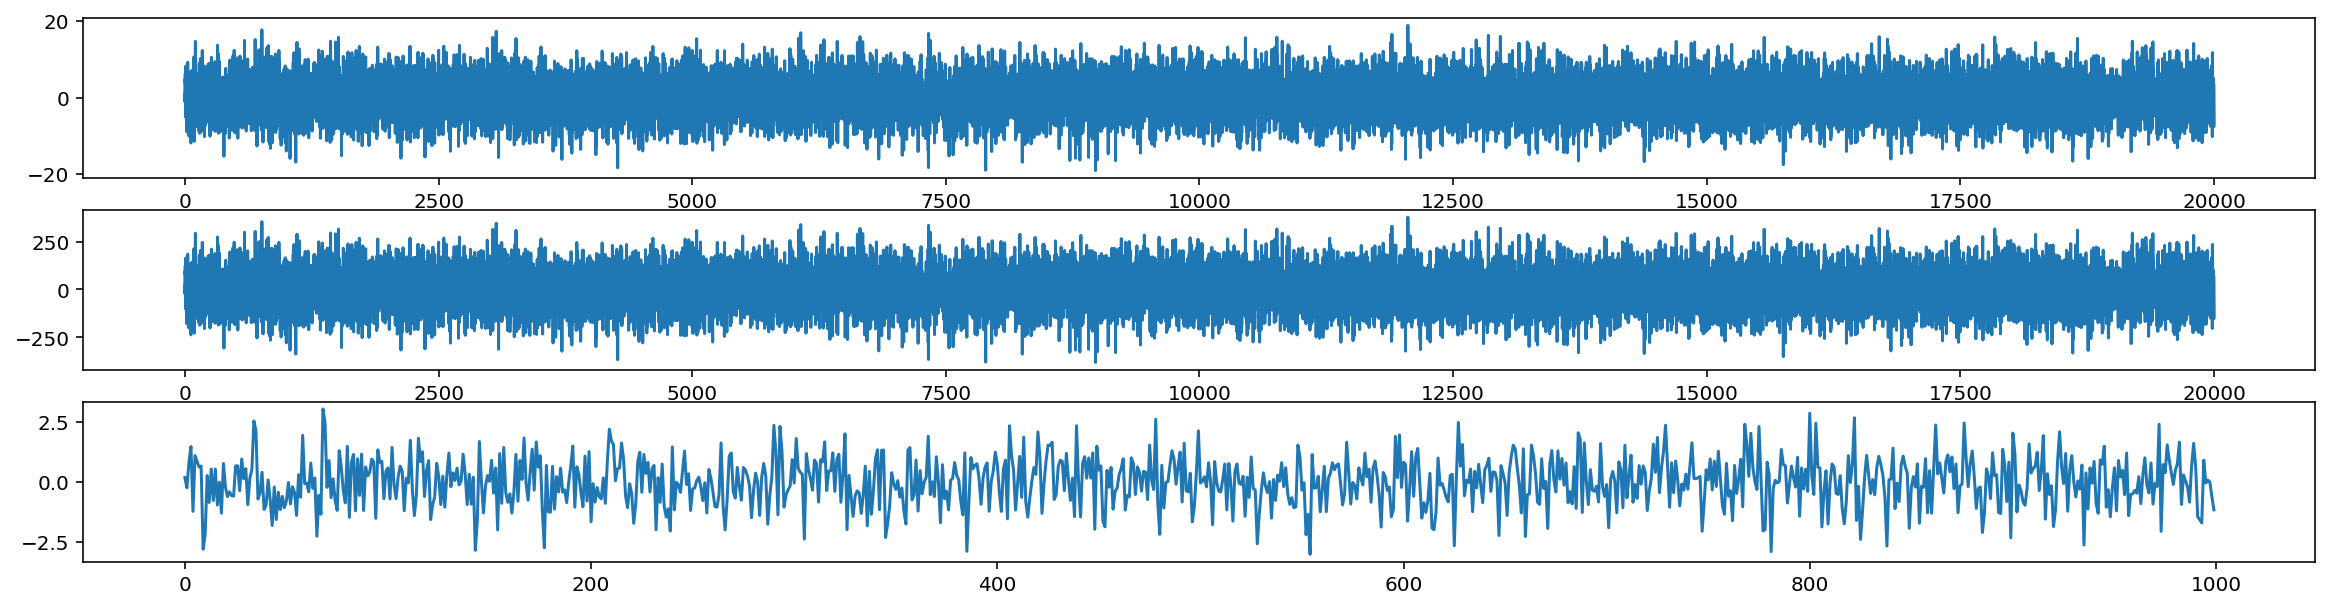

In [22]:
plt.figure(figsize=(20, 5))

plt.subplot(311)
plt.plot(model_1.resid)

plt.subplot(312)
plt.plot(model_2.resid)

plt.subplot(313)
plt.plot(model_3.resid)

plt.show()

- 과적합 : overfitting
    - 우리는 모집단을 분석하는게 아니라 표본 집단만 분석합니다.
    - 표본 집단으로만 모델을 만들기 때문에 표본집단에서만 예측을 잘하는 문제를 과적합이라고 합니다.
    - 판단 및 해결책
        - cross-validation 사용
        - 표본을 랜덤하게 나눠서 나눠진 표본별로 모델을 확인해서 정확도를 확인하는 방법입니다.

#### 결과 요약
- 회귀분석모델에서 좋은 모델을 만들기 위해서 feature selection과 nomalization을 잘해야 함
- feature selection을 잘 하기 위해서 요약표를 참고
- 요약표에서 중요한 내용
    - R-squared
        - 모델의 분산 설명력 의미 
        - 0 ~ 1 사이의 값을 가지며 1과 가까울수록 모델의 정확도가 올라감
    - coef. 
        - 회귀계수
        - 너무 0과 가까우면 모델에 영향을 거의 안 주게 되므로 계산량만 증가시킴
    - std.err.
        - 표준 에러
        - 회귀모델에서 평균에 대한 추세선의 데이터 퍼짐 정도를 나타냄
        - 높을수록 추세선의 신뢰도가 떨어짐
        - 그렇다고 낮은게 항상 좋은것은 아님 > 회귀계수가 0과 가까우면 낮게 나옴
    - t
        - t-test
        - 회귀계수가 우연인지 확인하는 지표
        - 0과 가까울수록 우연일 확률이 높음
    - P>|t|
        - p-value
        - t-test를 0 ~ 1 사이의 수치로 변환 한것
        - 대체로 0.05 이하의 수치를 가지면 해당 feature는 유의한것으로 판단
- 잔차도
    - 실제 데이터와 예측 데이터의 오차에 대한 분산
    - 그래프로 그려봤을때 일정한 잔차가 나오는 모델이 좋은 모델